<a href="https://colab.research.google.com/github/Nao9910/k-means/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

先頭列と先頭行がindexの状態のものを読み込む。

「ランタイム」→「すべてのセルを実行」で、終わったら左のファイルから「class_all.csv」、「class_list.csv」、「class_average.csv」をダウンロード。

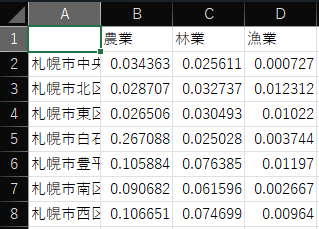

In [ ]:
# すでに同名のファイルが読み込まれている場合は削除
import os
if "file_name" in locals():
  os.remove("/content/"+str(file_name))
  print("file removed")
else:
  pass
# CSV読み込み
# 先頭行に分類名、先頭列に自治体名が入ったCSVファイルを読み込む
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving 投入用.csv to 投入用.csv


In [ ]:
# クラスター数の設定、直接入力か右のスライダーを動かす
cluster_num = 6 #@param {type:"slider", min:1, max:20, step:1}

In [ ]:
# ライブラリのインポート
import pandas as pd
from sklearn.cluster import KMeans

# データの読み込み
df = pd.read_csv( file_name , encoding="SHIFT-JIS", thousands=',', index_col=0)

# KMeansメソッドの実行
clu = KMeans(n_clusters= cluster_num)
df["class"] = clu.fit_predict(df)
df=df.replace({'class': {0: int(cluster_num)}}) # 1スタートにする
# print(df)

# クラス分け結果の出力 class_all.csv
df.to_csv ( 'class_all.csv' , encoding="SHIFT-JIS")

# クラス分け結果のみ出力 class_list.csv
df["class"].to_csv ( 'class_list.csv' , encoding="SHIFT-JIS")

# 各グループの平均値 class_average.csv
print('各グループの平均値')
print(df.groupby("class").mean())
a=df.groupby("class").mean()
a.to_csv('class_average.csv',encoding="SHIFT-JIS")

                 農業        林業        漁業  鉱業，採石業，砂利採取業    食料品製造業  飲料・たばこ・飼料製造業  \
札幌市中央区     0.034363  0.025611  0.000727      0.000885  0.242588      0.082848   
札幌市北区      0.028707  0.032737  0.012312      0.001365  1.387698      0.390865   
札幌市東区      0.026506  0.030493  0.010220      0.002885  2.575886      0.135652   
札幌市白石区     0.267088  0.025028  0.003744      0.000865  4.868636      1.403412   
札幌市豊平区     0.105884  0.076385  0.011970      0.000313  3.639315      0.093829   
...             ...       ...       ...           ...       ...           ...   
島尻郡久米島町    8.624165  0.000000  5.278103      0.005297  3.377777      4.052436   
島尻郡八重瀬町    7.776462  0.000000  0.404909      1.353028  1.782315      1.375486   
宮古郡多良間村   36.020908  0.000000  0.367669      0.012543  9.094203      0.109976   
八重山郡竹富町   16.223775  0.146871  1.564199      0.010676  3.485240      1.096050   
八重山郡与那国町   4.996822  0.000000  4.788285      0.015874  5.061372      5.141489   

              繊維工業  木材・木製品製

In [ ]:
# 各クラスターのデータ数
for num in range(1,cluster_num+1):
  sum=(df["class"] == num).sum()
  print(f"{num}:{sum}")

1:43
2:823
3:70
4:294
5:207
6:457


In [ ]:
# df.groupby("class").count()